In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Dropout,Activation,Flatten,MaxPooling2D,Dense
import keras
import pickle
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, ZeroPadding2D, MaxPooling2D
from keras.layers.convolutional import Conv2D
from keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
import matplotlib
import time
import numpy as np
from contextlib import redirect_stdout
X_train = pickle.load(open("X_train1.pickle","rb"))
y_train = pickle.load(open("y_train1.pickle","rb"))
X_test = pickle.load(open("X_test1.pickle","rb"))
y_test = pickle.load(open("y_test1.pickle","rb"))
X_train = X_train/255
X_test = X_test/255
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)
BATCH_SIZE = 32

Using TensorFlow backend.


In [2]:
nb_classes = 4

# Number of epochs to train (change it accordingly)
nb_epoch = 15  #25

# Total number of convolutional filters to use
nb_filters = 32
# Max pooling
nb_pool = 2
# Size of convolution kernel
nb_conv = 3
def custom_model_hand():
    '''
    USER CODE STARTS HERE
    '''
    image_model = Sequential()
    image_model = Sequential()
    
    
    image_model.add(Conv2D(nb_filters, (nb_conv, nb_conv),
                        padding='valid',
                        input_shape=(50,50,1)))
    convout1 = Activation('relu')
    image_model.add(convout1)
    image_model.add(Conv2D(nb_filters, (nb_conv, nb_conv)))
    convout2 = Activation('relu')
    image_model.add(convout2)
    image_model.add(MaxPooling2D(pool_size=(nb_pool, nb_pool)))
    image_model.add(Dropout(0.5))

    image_model.add(Flatten())
    image_model.add(Dense(128))
    image_model.add(Activation('relu'))
    image_model.add(Dropout(0.2))
    image_model.add(Dense(512))
    image_model.add(Dropout(0.2))
    image_model.add(Activation('relu'))

#     image_model.add(Dense(512))
#     image_model.add(Activation('tanh'))

    image_model.add(Dense(4))
    image_model.add(Activation('softmax'))
    image_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    #view model summary
    image_model.summary()
    with open('model_sumary.txt', 'w') as f:
    	with redirect_stdout(f):
        	image_model.summary()
    return image_model
    '''
    USER CODE ENDS HERE
    '''

In [3]:
def train_model(model):
    callbacks_list = [
        EarlyStopping(monitor='val_loss',patience=10),
        ModelCheckpoint(filepath='model_hand_gesture.h5',monitor='val_loss',save_best_only=True)
        ]
    history = model.fit(X_train,y_train,batch_size=BATCH_SIZE, epochs=15,verbose=1, 
                        validation_split=0.25,callbacks = callbacks_list)
    return history
def make_model(file):
    print("==================================================")

    print("Creating Model At: ",file)
    start_time = time.time()
    model = custom_model_hand()

    json_model = model.to_json()

    with open(file, "w") as json_file:
        json_file.write(json_model)

    end_time = time.time()
    total_time = end_time-start_time
    print("Model Created: ",total_time, " seconds")

    print("==================================================")


if __name__ == "__main__":
    print("create model succesfully")
    model = custom_model_hand()
    history = train_model(model)

create model succesfully
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 48, 48, 32)        320       
_________________________________________________________________
activation_1 (Activation)    (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 46, 46, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 46, 46, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 32)        0         
______________________________________________________________

In [4]:
predict = model.predict_classes(X_test)

predict = keras.utils.to_categorical(predict)

val_los,val_acc = model.evaluate(X_test,y_test)

print("accuracy = " +  str(val_acc * 100) + "%.")

87/87 [==============================] - 0s 1ms/step
accuracy = 100.0%.


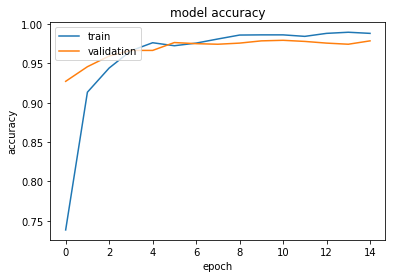

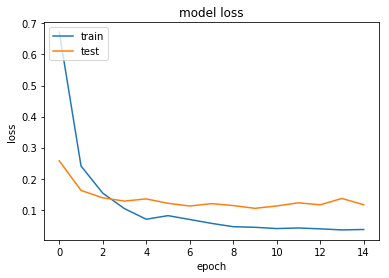

In [7]:
#plot
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()